Objectives
Steps to be used for analysis
Dataset to be used (URL)

Problem Statement
Music is one of the oldest and most culturally significant inventions of humanity which beyond entertainment has the ability to keep track of history and the state of human mood as a group. Spotify is one of the leading music streaming platforms with more than 80 million songs, 4 million podcasts and 442 million unique users. Its big chunk of the database provides a deep analysis of all songs, music, and artists.

Objective

1. To analyse the listening habits of people over the past decade
2. Analysing songs from different generations on the factors such as :
   - danceability
   - energy
   - key
   - loudness
   - mode
   - speechiness
   - acousticness
   - instrumentalness
   - liveness
   - valence
3. Growth of particular artists over the year
4. Analysing growth of departed artists like KK, Siddhu Moosewala, etc. before and after their death.
5. Comparative Analysis of songs and their remake versions.

Steps

1. Creating a Spotify Account
2. Registering the Spotify Developer Program
3. Creating spotify credentials for the project
4. Installing spotipy package
5. Initilaizing spotipy in Jupiter notebook.
6. Using previously created credetials for api calling
7. Storing the data in a pandas database
8. Analysing data and Plotting graphs using pandas, numpy and Matplotlib


In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
from math import pi
import matplotlib.pyplot as plt
import re
import time

In [61]:
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy
from spotipy.oauth2 import SpotifyOAuth

cid = '5d9494efb79d4abaabc13e9778431f49'
secret = '4d23d535c7fe4e9cadd241ddf58df15e'
scope = "user-read-currently-playing"

client_credentials_manager = SpotifyClientCredentials(
    client_id=cid, client_secret=secret)

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(
    client_id=cid, client_secret=secret, redirect_uri="http://localhost:9000"))

# sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager, scope=scope)
sp.user('pratham')


{'display_name': 'pratham',
 'external_urls': {'spotify': 'https://open.spotify.com/user/pratham'},
 'followers': {'href': None, 'total': 0},
 'href': 'https://api.spotify.com/v1/users/pratham',
 'id': 'pratham',
 'images': [],
 'type': 'user',
 'uri': 'spotify:user:pratham'}

In [71]:
results = sp.current_user_playing_track()
results['item']['name']

'Alag Aasmaan'

In [73]:
data = pd.DataFrame(
    sp.audio_analysis("7ouMYWpwJ422jRcDASZB7P")['bars']
)
data

,start,duration,confidence
0,1.31162,1.73999,0.686
1,3.05161,1.74941,0.624
2,4.80102,1.73296,0.242
3,6.53398,1.69715,0.622
4,8.23113,1.28113,0.734
...,...,...,...
195,350.35190,2.25728,0.644
196,352.60920,2.30314,0.516
197,354.91232,2.27877,0.505
198,357.19110,2.31424,0.336


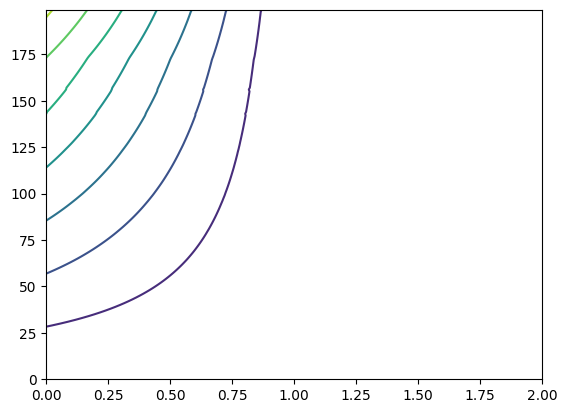

In [79]:
plt.scatter()
plt.show()

In [97]:
# sp.current_user_top_tracks(limit=20, offset=0, time_range='medium_term')
song1 = pd.Series(sp.audio_features("7ouMYWpwJ422jRcDASZB7P")[0])
song1 = song1.drop(['duration_ms','type','uri','track_href','analysis_url','mode','time_signature'])
song1

danceability                         0.366
energy                               0.963
key                                     11
loudness                            -5.301
speechiness                          0.142
acousticness                      0.000273
instrumentalness                    0.0122
liveness                             0.115
valence                              0.211
tempo                              137.114
id                  7ouMYWpwJ422jRcDASZB7P
dtype: object

In [98]:
song2 = pd.Series(sp.audio_features("5iyNH1Dmxif1k4Nl1gMeuh")[0])
# song2 = song2[song2.str.isnumeric() != False]
song2 = song2.drop(['duration_ms','type','uri','track_href','analysis_url','mode','time_signature'])
song2

danceability                         0.678
energy                               0.622
key                                      5
loudness                            -7.988
speechiness                         0.0695
acousticness                         0.138
instrumentalness                  0.000002
liveness                             0.122
valence                              0.535
tempo                              100.005
id                  5iyNH1Dmxif1k4Nl1gMeuh
dtype: object

In [99]:
df1 = pd.DataFrame([song1, song2],columns=song1.index)
df1 = df1.set_index('id')
df1

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
id,,,,,,,,,,
7ouMYWpwJ422jRcDASZB7P,0.366,0.963,11,-5.301,0.1420,0.000273,0.012200,0.115,0.211,137.114
5iyNH1Dmxif1k4Nl1gMeuh,0.678,0.622,5,-7.988,0.0695,0.138000,0.000002,0.122,0.535,100.005


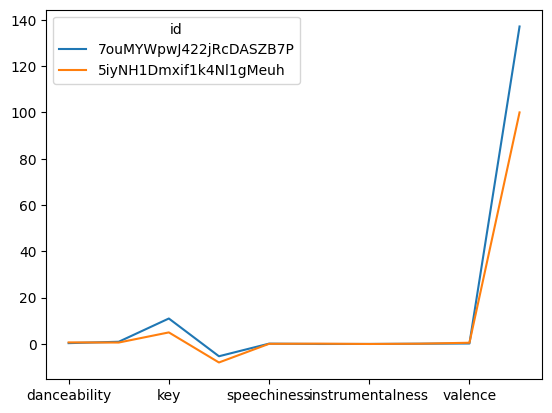

In [100]:
df1.T.plot()
plt.show()

In [186]:
# creating empty df
# cols = ['Name','id'] + song1.index
noNameDF = pd.DataFrame([],columns=song1.index)
type(song1.index)

pandas.core.indexes.base.Index

In [174]:
noNameAlbum = sp.album_tracks("57SIarHHgfby4AvV6ftCB5")
for i in range(noNameAlbum['total']):
	print(noNameAlbum['items'][i]['id'])



# for i in noNameAlbum[0]:
	# print(i)


3JkVYvxNoGf2HCWJo61462
1skGwRjc7wYY70PJCAkKMr
1w3exvIgbRFV2ijf6qyWm8
7cVe3mYMIfhOlz1NXFWv70
1O00WM9qGLUBA5gq2yw0WF


In [28]:
sp.current_user_playing_track()

In [29]:
artist_name = []
track_name = []
popularity = []
track_id = []
for i in range(0, 100):
    track_results = sp.search(q='year:2018', type='track', limit=50, offset=i)
    for i, t in enumerate(track_results['tracks']['items']):
        artist_name.append(t['artists'][0]['name'])
        track_name.append(t['name'])
        track_id.append(t['id'])
        popularity.append(t['popularity'])


In [30]:
track_name


["O'Meri Laila",
 'Jo Tu Na Mila',
 "Jaan 'Nisaar (Arijit)",
 'Baarishein',
 'Tera Ghata',
 'Qaafirana',
 'Aaya Na Tu',
 'Namo Namo',
 'Waqt Ki Baatein',
 'Sakhiyaan',
 'Ek Raat',
 'Kaam 25 - Sacred Games',
 'Pal',
 'Tera Yaar Hoon Main',
 'Sweetheart',
 'Strawberries & Cigarettes',
 'Kya Baat Ay',
 'Bandeya (feat. Arijit Singh) - From "Dil Juunglee"',
 'Naina Da Kya Kasoor',
 'Humnava Mere',
 'O Saathi',
 'Tareefan',
 'Proper Patola',
 'FRIENDS',
 'lovely (with Khalid)',
 'Bom Diggy Diggy',
 'Dusk Till Dawn (feat. Sia) - Radio Edit',
 'Love Me Like You Do',
 'Call Out My Name',
 'Attention',
 'Tera Fitoor',
 'Sun Saathiya',
 'Chogada (From "Loveyatri")',
 'Living Life, In The Night',
 'SAD!',
 'Into Your Arms (feat. Ava Max)',
 'Bad Liar',
 'No Lie',
 'Let Me Down Slowly',
 'Hope',
 'I Was Never There',
 '2002',
 'Darkside',
 'Faded',
 'Gali Gali (From "Kgf Chapter 1")',
 'Mera Dil Bhi Kitna Pagal Hai - Recreated Version',
 'One Kiss (with Dua Lipa)',
 'Bad Boy (feat. Luana Kiara)',
 

In [6]:
birdy_uri = 'spotify:artist:2WX2uTcsvV5OnS0inACecP'

results = sp.artist_albums(birdy_uri, album_type='album')
albums = results['items']
while results['next']:
    results = sp.next(results)
    albums.extend(results['items'])

for album in albums:
    print(album['name'])


Young Heart
Beautiful Lies
Beautiful Lies
Beautiful Lies (Deluxe)
Beautiful Lies (Deluxe)
Fire Within
Fire Within
Fire Within (Deluxe)
Fire Within (Deluxe)
Fire Within (Deluxe)
Live in London
Birdy
Birdy
Birdy
Birdy
Birdy (Deluxe Version)


Siddhu Moosewala Analysis

In [110]:
# Point Spotipy library at Beatles Spotify page 
artist = sp.artist("https://open.spotify.com/artist/5K4W6rqBFWDnAN6FQUkS6x")
# https://open.spotify.com/artist/0tC995Rfn9k2l7nqgCZsV7?si=1OsvzfKFQ4OGloygC1Qstg
# https://open.spotify.com/artist/1mYsTxnqsietFxj1OgoGbG?si=h34gjDirRNWr2NNWsiwtPQ
# https://open.spotify.com/artist/5K4W6rqBFWDnAN6FQUkS6x?si=PkXiyThETGahoCPu6xADBQ
# Store artist's albums in list
beatles_albums = []

# Extract artist's uri
artist_albums = sp.artist_albums(artist['id'], album_type='album')

#Pull all of the artist's albums
beatles_albums.extend(artist_albums['items'])
while artist_albums['next']:
    artist_albums = sp.next(artist_albums)
    beatles_albums.extend(artist_albums['items'])

for album in beatles_albums:
    name = album['name']
    print((' ' + name))

 Donda (Deluxe)
 Donda
 JESUS IS KING
 KIDS SEE GHOSTS
 KIDS SEE GHOSTS
 ye
 The Life Of Pablo
 The Life Of Pablo
 Yeezus
 Watch The Throne (Deluxe)
 Watch The Throne
 Watch The Throne
 My Beautiful Dark Twisted Fantasy
 My Beautiful Dark Twisted Fantasy
 808s & Heartbreak
 Graduation
 Graduation
 Late Registration
 Late Registration
 The College Dropout
 The College Dropout


In [111]:
beatles_albums.sort(key=lambda album:album['name'].lower())
beatles_album_names = [album['name'] for album in beatles_albums]
beatles_album_names

['808s & Heartbreak',
 'Donda',
 'Donda (Deluxe)',
 'Graduation',
 'Graduation',
 'JESUS IS KING',
 'KIDS SEE GHOSTS',
 'KIDS SEE GHOSTS',
 'Late Registration',
 'Late Registration',
 'My Beautiful Dark Twisted Fantasy',
 'My Beautiful Dark Twisted Fantasy',
 'The College Dropout',
 'The College Dropout',
 'The Life Of Pablo',
 'The Life Of Pablo',
 'Watch The Throne',
 'Watch The Throne',
 'Watch The Throne (Deluxe)',
 'ye',
 'Yeezus']

In [112]:
beatles_album_uris = [album['uri'] for album in beatles_albums]
beatles_album_uris

['spotify:album:3WFTGIO6E3Xh4paEOBY9OU',
 'spotify:album:5CnpZV3q5BcESefcB3WJmz',
 'spotify:album:2Wiyo7LzdeBCsVZiRA6vVZ',
 'spotify:album:4SZko61aMnmgvNhfhgTuD3',
 'spotify:album:4WNXpeZR1jc2NFgOAeyLMB',
 'spotify:album:0FgZKfoU2Br5sHOfvZKTI9',
 'spotify:album:1oK1GzEMNDjCt7EYYpomwc',
 'spotify:album:6pwuKxMUkNg673KETsXPUV',
 'spotify:album:5ll74bqtkcXlKE7wwkMq4g',
 'spotify:album:4yJqrqT2BpuXLj5BMJlAXR',
 'spotify:album:20r762YmB5HeofjMCiPMLv',
 'spotify:album:6klUp8sQyRXGuJhqZu4PG3',
 'spotify:album:4Uv86qWpGTxf7fU7lG5X6F',
 'spotify:album:3lQePoIm6iNQIiZkCYxCy0',
 'spotify:album:7gsWAHLeT0w7es6FofOXk1',
 'spotify:album:7u6Q36bDPiNegcQ7u69bKq',
 'spotify:album:0OcMap99vLEeGkBCfCwRwS',
 'spotify:album:6Oa0ZYzr4VdFIz3zNmYJYQ',
 'spotify:album:2P2Xwvh2xWXIZ1OWY9S9o5',
 'spotify:album:2Ek1q2haOnxVqhvVKqMvJe',
 'spotify:album:7D2NdGvBHIavgLhmcwhluK']

In [114]:
def album_songs(uri):
    album = uri 
    spotify_albums[album] = {}
    # Create keys-values of empty lists inside nested dictionary for album
    spotify_albums[album]['album'] = [] 
    spotify_albums[album]['track_number'] = []
    spotify_albums[album]['id'] = []
    spotify_albums[album]['name'] = []
    spotify_albums[album]['uri'] = []
    # Pull data on album tracks
    tracks = sp.album_tracks(album) 
    for n in range(len(tracks['items'])): 
        spotify_albums[album]['album'].append(beatles_album_names[album_count]) 
        spotify_albums[album]['track_number'].append(tracks['items'][n]['track_number'])
        spotify_albums[album]['id'].append(tracks['items'][n]['id'])
        spotify_albums[album]['name'].append(tracks['items'][n]['name'])
        spotify_albums[album]['uri'].append(tracks['items'][n]['uri'])

In [115]:
# Store all the albums
spotify_albums = {}
album_count = 0
for i in beatles_album_uris: #each album
    album_songs(i)
    print(str(beatles_album_names[album_count]) + " album songs has been added to spotify_albums dictionary")
    album_count+=1 # Updates album count once all tracks have been added

808s & Heartbreak album songs has been added to spotify_albums dictionary
Donda album songs has been added to spotify_albums dictionary
Donda (Deluxe) album songs has been added to spotify_albums dictionary
Graduation album songs has been added to spotify_albums dictionary
Graduation album songs has been added to spotify_albums dictionary
JESUS IS KING album songs has been added to spotify_albums dictionary
KIDS SEE GHOSTS album songs has been added to spotify_albums dictionary
KIDS SEE GHOSTS album songs has been added to spotify_albums dictionary
Late Registration album songs has been added to spotify_albums dictionary
Late Registration album songs has been added to spotify_albums dictionary
My Beautiful Dark Twisted Fantasy album songs has been added to spotify_albums dictionary
My Beautiful Dark Twisted Fantasy album songs has been added to spotify_albums dictionary
The College Dropout album songs has been added to spotify_albums dictionary
The College Dropout album songs has been 

In [117]:
def audio_features(album):
    # Add new key-values to store audio features
    spotify_albums[album]['acousticness'] = []
    spotify_albums[album]['danceability'] = []
    spotify_albums[album]['duration_ms'] = []
    spotify_albums[album]['energy'] = []
    spotify_albums[album]['instrumentalness'] = []
    spotify_albums[album]['liveness'] = []
    spotify_albums[album]['loudness'] = []
    spotify_albums[album]['speechiness'] = []
    spotify_albums[album]['tempo'] = []
    spotify_albums[album]['valence'] = []
    spotify_albums[album]['popularity'] = []
    
    track_count = 0
    for track in spotify_albums[album]['uri']:
        # Pull audio features per track
        features = sp.audio_features(track)
        
        # Append to relevant key-value
        spotify_albums[album]['acousticness'].append(features[0]['acousticness'])
        spotify_albums[album]['danceability'].append(features[0]['danceability'])
        spotify_albums[album]['duration_ms'].append(features[0]['duration_ms'])
        spotify_albums[album]['energy'].append(features[0]['energy'])
        spotify_albums[album]['instrumentalness'].append(features[0]['instrumentalness'])
        spotify_albums[album]['liveness'].append(features[0]['liveness'])
        spotify_albums[album]['loudness'].append(features[0]['loudness'])
        spotify_albums[album]['speechiness'].append(features[0]['speechiness'])
        spotify_albums[album]['tempo'].append(features[0]['tempo'])
        spotify_albums[album]['valence'].append(features[0]['valence'])
        # Popularity is stored elsewhere:
        pop = sp.track(track)
        spotify_albums[album]['popularity'].append(pop['popularity'])
        track_count+=1

In [120]:
sleep_min = 2
sleep_max = 5
start_time = time.time()
request_count = 0
for i in spotify_albums:
    audio_features(i)
    request_count+=1
    if request_count % 5 == 0:
        print(str(request_count) + " playlists completed")
        time.sleep(np.random.uniform(sleep_min, sleep_max))
        print('Loop #: {}'.format(request_count))
        print('Elapsed Time: {} seconds'.format(time.time() - start_time))

5 playlists completed
Loop #: 5
Elapsed Time: 43.82334280014038 seconds
10 playlists completed
Loop #: 10
Elapsed Time: 75.82487392425537 seconds
15 playlists completed
Loop #: 15
Elapsed Time: 119.76237416267395 seconds
20 playlists completed
Loop #: 20
Elapsed Time: 153.59530973434448 seconds


In [121]:
df = pd.DataFrame.from_dict(dic_df)

NameError: name 'dic_df' is not defined